<a href="https://colab.research.google.com/github/praskar10/Text_Extraction/blob/main/Text_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (215 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [12]:
!pip install pdf2image

In [11]:
!pip install poppler-utils

In [3]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 21.0 MB/s eta 0:00:00


In [13]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy


reader = easyocr.Reader(['en', 'mr'])


images = convert_from_path('/content/AGR 201-2.pdf')

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [14]:
from IPython.display import display, Image
display(images[0:-1])

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1433x2024>,
 <PIL.PpmI

In [15]:
bounds = reader.readtext(np.array(images[5]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder="beamsearch", beamWidth=10)
bounds

[([[162, 290], [1290, 290], [1290, 347], [162, 347]],
  'होतो. देठ वेडेवाकडे होतात. खोडांचा आकार बारीक होतो. खालच्या पानावर निळसर',
  0.4319709153127275),
 ([[157, 347], [1289, 347], [1289, 407], [157, 407]],
  'हिरवी झाक व जांभळे ठिपके दिसतात. त्यांची प्रकाश संश्लेषणाची क्रिया मंदावतेः जास्त',
  0.34263897274762317),
 ([[158, 401], [1291, 401], [1291, 464], [158, 464]],
  'कमतरता असल्यास पाने पिवळी पडतात. पाने अकाली गळतात. फळझाडामध्ये मोहोर',
  0.3245186407033078),
 ([[159, 459], [1291, 459], [1291, 519], [159, 519]],
  'कमी येऊन फळे कमी लागतातः फळांचा पक्वताकाळ लांबतो. संत्र्याच्या फळांची साल',
  0.25035205734005683),
 ([[159, 512], [1293, 512], [1293, 581], [159, 581]],
  'जाड होऊन ती आतून पोकळ होते. शुगरबीटच्या पानांमध्ये फॉस्फेटचे युग्मीकरण',
  0.5023918930693367),
 ([[160, 582], [560, 582], [560, 634], [160, 634]],
  '( फॉस्फोरिलेशन ) कमी   होते.',
  0.34455130667453626),
 ([[578, 575], [1285, 575], [1285, 628], [578, 628]],
  'बटाट्याच्या आतील भागात लालसर गंज  दिसतो.',
  0.39596

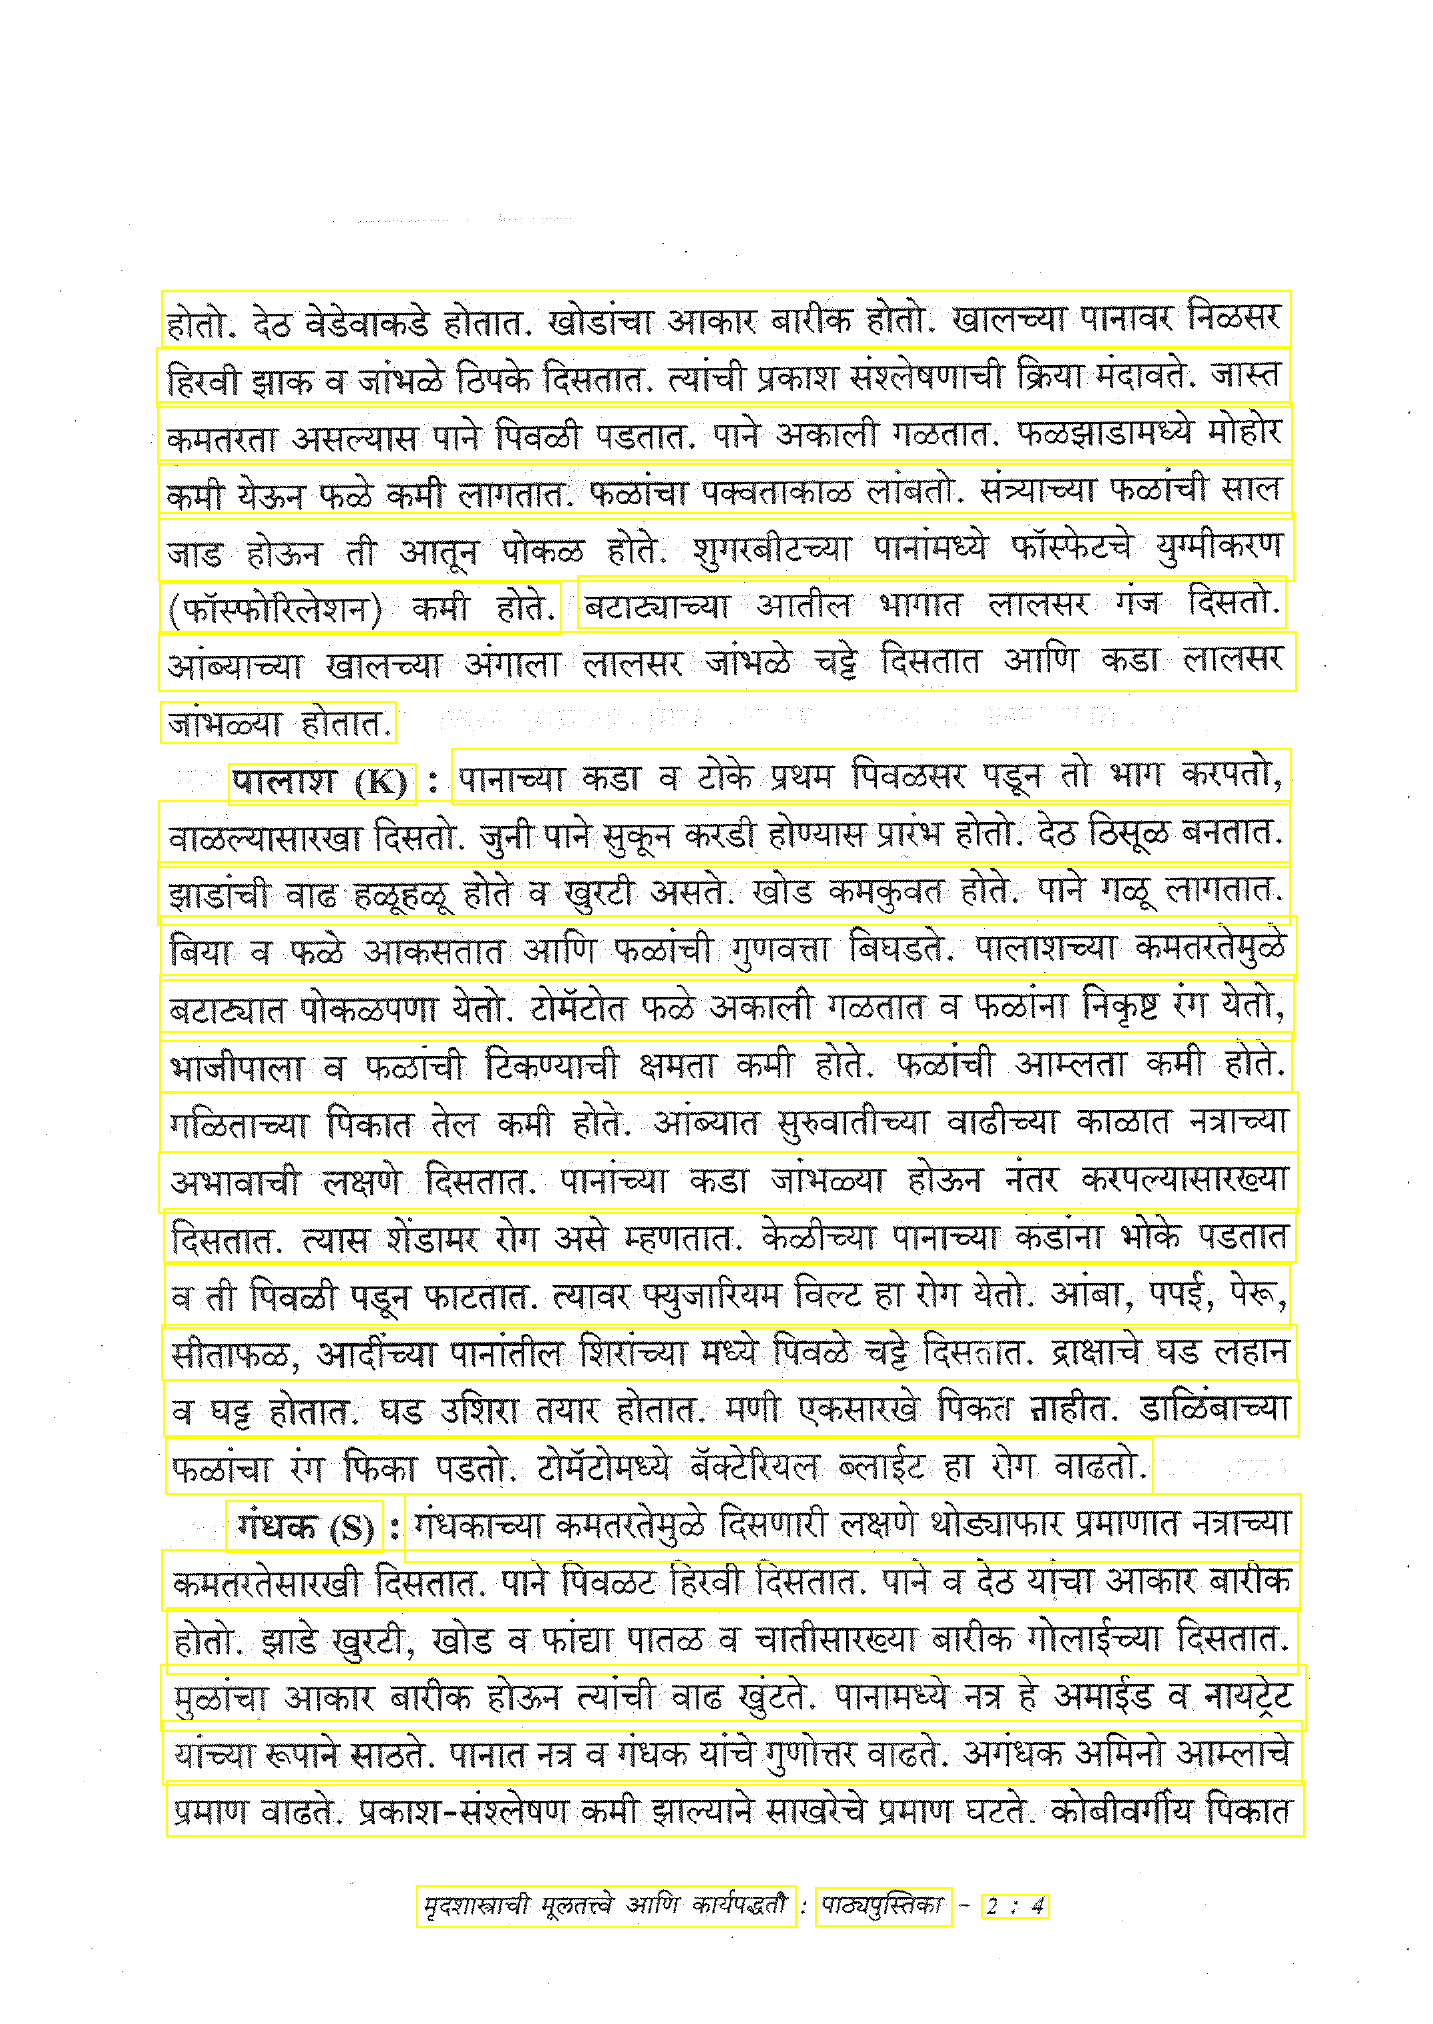

In [16]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(images[5], bounds)

In [17]:
bounds[0][1]

'होतो. देठ वेडेवाकडे होतात. खोडांचा आकार बारीक होतो. खालच्या पानावर निळसर'

In [18]:
text = ''
for i in range(len(bounds)):
  text += bounds[i][1] + '\n'

print(text)

होतो. देठ वेडेवाकडे होतात. खोडांचा आकार बारीक होतो. खालच्या पानावर निळसर
हिरवी झाक व जांभळे ठिपके दिसतात. त्यांची प्रकाश संश्लेषणाची क्रिया मंदावतेः जास्त
कमतरता असल्यास पाने पिवळी पडतात. पाने अकाली गळतात. फळझाडामध्ये मोहोर
कमी येऊन फळे कमी लागतातः फळांचा पक्वताकाळ लांबतो. संत्र्याच्या फळांची साल
जाड होऊन ती आतून पोकळ होते. शुगरबीटच्या पानांमध्ये फॉस्फेटचे युग्मीकरण
( फॉस्फोरिलेशन ) कमी   होते.
बटाट्याच्या आतील भागात लालसर गंज  दिसतो.
आंब्याच्या खालच्या अंगाला लालसर जांभळे चट्टे दिसतात आणि कडा लालसर
जांभळ्या होतात.
पालाश (k
पानाच्या कडा व टोके प्रथम पिवळसर पडून तो भाग करपतो,
वाळल्यासारखा दिसतो. जुनी पाने सुकून करडी होण्यास प्रारंभ होतो. देठ ठिसूळ बनतात.
झाडांची वाढ हळूहळू होते व खुरटी असते. खोड कमकुवत होते. पाने गळू लागतात.
बिया व फळे आकसतात आणि फळांची गुणवत्ता बिघडते. पालाशच्या कमतरतेमुळे
बटाट्यात पोकळपणा येतो. टोमॅटोत फळे अकाली गळतात व फळांना निकृष्ट रंग येतो,
भाजीपाला व फळांची टिकण्याची क्षमता कमी होते. फळांची आम्लता कमी होते.
गळिताच्या पिकात तेल कमी होते. आंब्यात सुरुवातीच्या वाढीच

In [19]:
with open('extracted_text.txt', 'w') as file:
    file.write(text)

In [20]:
!pip install spacy

In [21]:
%pip install https://github.com/explosion/spacy-models/releases/download/xx_ent_wiki_sm-3.7.0/xx_ent_wiki_sm-3.7.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [22]:
nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('xx_ent_wiki_sm')

In [23]:
doc = nlp(text)

In [24]:
from spacy import displacy

In [25]:
displacy.render(nlp(doc.text), style='ent', jupyter=True)

In [26]:
with open('extracted_text.txt', 'w') as file:
    file.write(text)